## The Shooting Method

This is a "trial and error" method for solving boundary value problems. Given the value at a boundary, an inital guess may **overshoot** or **undershoot**. We continue guessing until the solution converges to the correct boundary condition.

## Vertical position of a thrown ball

The equation of motion of a ball thrown upward, with only gravitational forces acting on it, and air friction is negligible, is given by
$$ \frac{d^2x}{dt^2} = -g $$
This can be written as
$$ \frac{dx}{dt} = v, \qquad \frac{dy}{dt} = -g $$ 
At $t=0$, the ball is near the ground, so $x=0$. At some $t=10$ s, the ball falls back on the ground, $x=0$.  

In [23]:
# importing the usual libraries
import numpy as np
import matplotlib.pyplot as plt

g = 9.81    # acceleration due to gravity

# function for evaluating RHS of the freefall equations of motion
def f(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = -g
    return np.array([fx,fv],float)

def rk4(a,b,N,r,val=False):
    h = (b-a)/N
    tp = np.arange(a,b,h)
    xp = []
    vp = []

    for t in tp:
        xp.append(r[0])
        vp.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

    if val==True:
        return xp[-1]
    else:
        return tp, xp, vp

### Initial guess $v (t=0) = 30$ m/s.

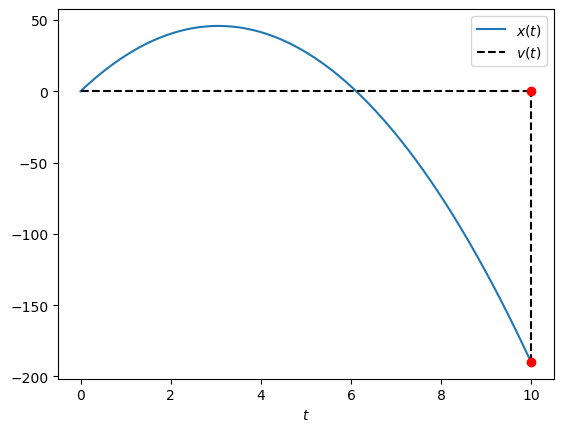

In [24]:
a = 0
b = 10
N = 1000

v0 = 30   # m/s, the trial initial value of velocity
r = np.array([0.0, v0],float) # initial values of x and y at t=0

# obtain the integration of the ODEs by calling the function rk4
arr = rk4(a,b,N,r)

plt.plot(arr[0],arr[1],label=r'$x(t)$')
plt.plot([a,b],[0,0],'k--',label=r'$v(t)$')
plt.plot([b,b],[arr[1][-1],0],'k--')
plt.plot([b],[0],c='r',marker='o')
plt.plot([b],arr[1][-1],c='r',marker='o')
plt.xlabel(r'$t$')
plt.legend()
plt.show()

**This initial guess was an undershot**.

### Initial guess $v (t=0) = 60$ m/s.

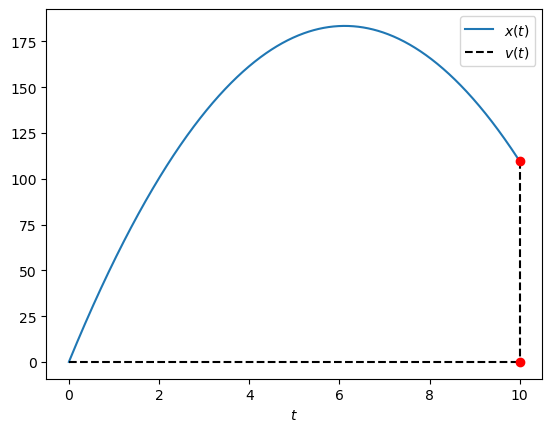

In [25]:
v0 = 60   # m/s, the trial initial value of velocity
r = np.array([0.0, v0],float) # initial values of x and y at t=0

# obtain the integration of the ODEs by calling the function rk4
arr = rk4(a,b,N,r)

plt.plot(arr[0],arr[1],label=r'$x(t)$')
plt.plot([a,b],[0,0],'k--',label=r'$v(t)$')
plt.plot([b,b],[arr[1][-1],0],'k--')
plt.plot([b],[0],c='r',marker='o')
plt.plot([b],arr[1][-1],c='r',marker='o')
plt.xlabel(r'$t$')
plt.legend()
plt.show()

**This initial guess was an overshot**.

Finding the correct solution, thus, boils down to finding the correct initial guess $v_0$ for which the solution gives $x=0$ at $t=10$ s. Let us use the bisection method so that the $x(t=10)$ converges to 0.

In [29]:
# Finding roots (or nodes) using bisection method
v01   = 30               # initial guess, correct guess must lie between over- and under-shot guesses.
v02   = 60
x1    = rk4(a,b,N,[0,v01],True)
x2    = rk4(a,b,N,[0,v02],True)
eps   = 1e-6             # target accuracy

while abs(x2-x1)>eps:
    v0 = (v01+v02)/2
    x  = rk4(a,b,N,[0,v0],True)    # compute the function at v0
    if x1*x>0:
        v01 = v0
        x1 = x
    else:
        v02 = v0
        x2 = x

v0 = (v01+v02)/2.
print("The correct initial guess for velocity is",v0)

The correct initial guess for velocity is 49.00095001794398


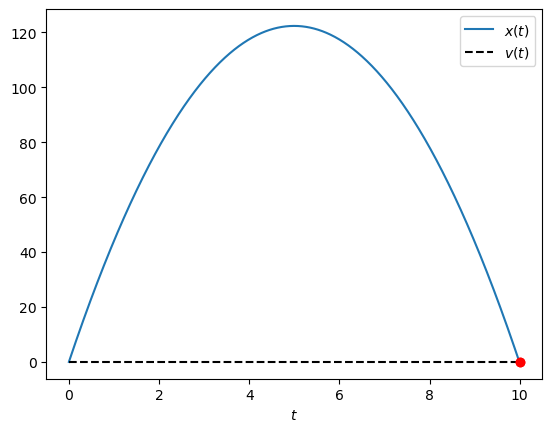

In [30]:
r = np.array([0.0, v0],float) # initial values of x and y at t=0

# obtain the integration of the ODEs by calling the function rk4
arr = rk4(a,b,N,r)

plt.plot(arr[0],arr[1],label=r'$x(t)$')
plt.plot([a,b],[0,0],'k--',label=r'$v(t)$')
plt.plot([b,b],[arr[1][-1],0],'k--')
plt.plot([b],[0],c='r',marker='o')
plt.plot([b],arr[1][-1],c='r',marker='o')
plt.xlabel(r'$t$')
plt.legend()
plt.show()

## Relaxation Method -- Eigenvalue Problems

This is in a sense opposite to the shooting method. You start with an initial guess for the entire solution such that the boundary conditions match. Then you slowly converge to the correct solution.

## Calculating Electric Potentials

Given a stationary charge distribution $\rho$, it is easier to evaluate the electrostatic potential $\Phi$ and then obtain the electric field from $\vec{\boldsymbol{E}} = - \vec{\boldsymbol{\nabla}}V$. A very powerful method to determine the potential is using the **Poisson's equation**
$$ \nabla^2\Phi = \frac{\rho}{\epsilon_0} $$
Very often we want to determine the potential in a region where $\rho=0$, and in this region Poisson's equation reduces to **Laplace equation**:
$$ \nabla^2\Phi = 0 $$
The general solution to this equation is: $\Phi(x) = ax+b$.  
Consider a one-dimensional world with two point conductors located at $x=0$ and at $x=L$. At $x=L$, the conductor is grounded ($\Phi=0$ V) and at $x=0$, it is kept at a potential of $V_0$. The solution of the potential between $0<x<L$ should then be: $\Phi(x) = -(V_0/L) x + V_0$.

### Adopted from [Danny Caballero PHYS 415 Notes](https://dannycaballero.info/phy415fall23/content/2_EM/Numerics/notes-relaxation.html)

We start by discretizing the double derivative and re-writing the ODE.

$$
\begin{align}
f'(x_i) &\approx \frac{f(x_i+h)+f(x_i-h)}{2} \\
f''(x_i) &\approx \frac{f(x_i+h)-2f(x_i)+f(x_i-h)}{h^2}
\end{align}$$

So we can write Laplace's equation as:

$$
\begin{align}
\frac{\Phi(x_i+h)-2\Phi(x_i)+\Phi(x_i-h)}{h^2}=& 0 \\
{\rm or,}\_ \Phi(x_i+h)-2\Phi(x_i)+\Phi(x_i-h)=& 0
\end{align}
$$

Thus, we can solve for the value of $V(x_i)$ at each point in the grid. 

$$\Phi(x_i)=\frac{1}{2}\left[\Phi(x_i+h)+\Phi(x_i-h)\right]$$

which is precisely the **average of the value of the potential to the left and right of the grid point**.

The solution converged after 21980 iterations.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Relaxation Method: Overlaid Iterations'}, xlabel='Position (x)', ylabel='Electric Potential (V)'>)

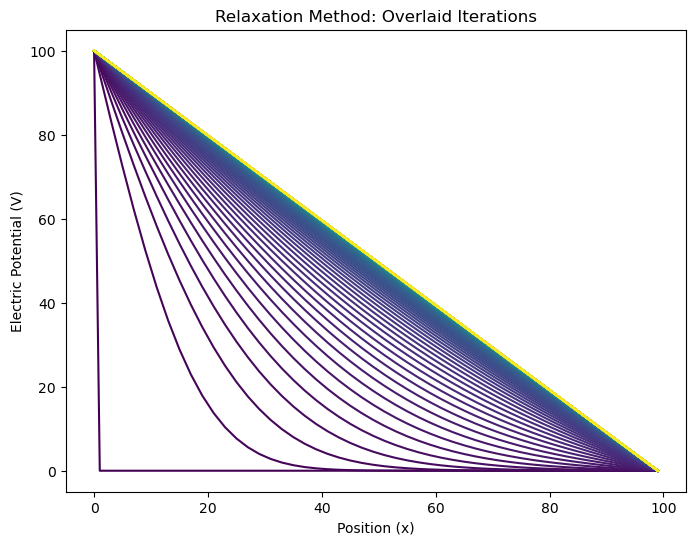

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def relax(phi, tol=1e-6, n=50):
    '''Relaxation method for solving Laplace's equation in 1D. 
    Requires the initial array and the tolerance.'''
    
    a        = phi.copy()  # to avoid overwriting the initial array
    arrays   = [a.copy()]  # to store the array at each iteration
    conv     = False       # to check if the solution has converged
    iter_num = 0           # to count the number of iterations
    
    while not conv:
        # Compute the average of the two neighboring points
        # as long as they are not boundaries
        # and do so until you reach the desired tolerance
        iter_num += 1
        new_a = a.copy()
        
        # Computing the average of the two neighboring points
        for i in range(1, len(a) - 1):  # Excluding boundaries
            new_a[i] = 0.5 * (a[i - 1] + a[i + 1])
        
        # checking if the solution has converged (i.e., achieved the desired tolerance)
        # this is point by point convergence (See why?)
        conv = np.all(np.abs(new_a - a) < tol)
        
        a = new_a.copy()
        
        # store every nth iteration (default is 50)
        if iter_num % n == 0:
            arrays.append(a.copy())
    
    return arrays, iter_num

def plot_relaxation(arrays, total_iterations):
    print(f'The solution converged after {total_iterations} iterations.')

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(arrays)))  # Create a colormap for the iterations

    for i, array in enumerate(arrays):
        ax.plot(array, color=colors[i], label=f'Iteration: {i}')
    
    ax.set_title('Relaxation Method: Overlaid Iterations')
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Electric Potential (V)')
    
    return fig, ax

N    = 100  # number of grid points
tol  = 1e-6 # tolerance
n    = 50   # store every nth iteration
Phi0 = np.zeros(N) # initial guess for the solution

# Boundary conditions
Phi0[0]  = 100 # left boundary (100 V)
Phi0[-1] = 0   # right boundary (0 V)

Phi, tot_iter = relax(Phi0, tol, n)
plot_relaxation(Phi, tot_iter)

### Sinusoidal Initial Guess

The solution converged after 21980 iterations.


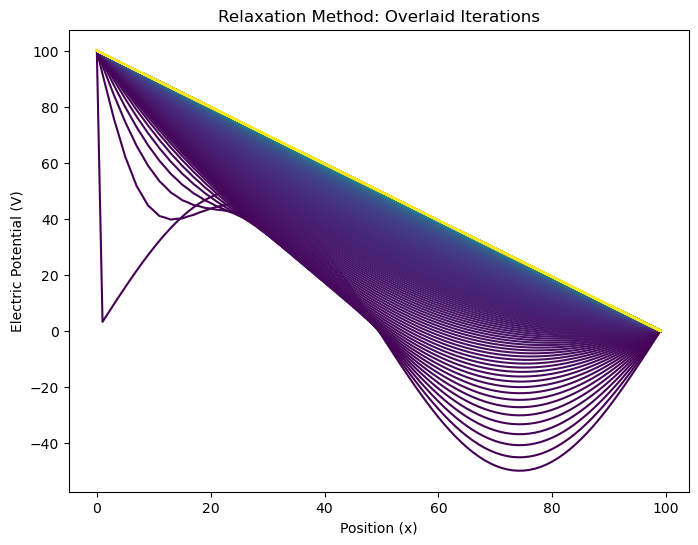

In [6]:
N    = 100 # number of grid points
x    = np.linspace(0, 2*np.pi, N)
Phi0 = 50*np.sin(x) # initial array
tol  = 1e-6 # tolerance
n    = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);

# Try it yourself

### Total 4 marks

* Experiment with a quadratic initial guess ($\sim \pm x^2$). Does the number of iterations to converge increase or decrease?
* Try a linear initial guess ($\sim x$). How fast does the solution coverge now?
* Try reducing the tolerance to $0.001$. In this case, plot only the final solution along with the expected analytical solution.